# Motivation
Getting involved in stock market trading and earlier research in macroeconomic relationships made me ask the following question:
- As the economy of Turkey is considerably dollarized and is dependent on US economy, is there a causal relationship between NASDAQ-COMP and BIST100 stock market indices?

This analysis will try to answer this question.

Data used:
- All NASDAQ-COMP and BIST100 data possible

Sampling frequency:
- Monthly data is used because of timezone issues.

Technique:
- Granger causality analysis

In [22]:
import yfinance
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Retrieve and Visualize NASDAQ-COMP and BIST100 Data

In [23]:
# Access NASDAQ-Comp and BIST100 data
nasdaq_comp = yfinance.Ticker("^IXIC")
bist100     = yfinance.Ticker("XU100.IS")
# Retrieve time series of index prices 
nasdaq_series  = nasdaq_comp.history(interval = "1mo", period = "max")
bist100_series = bist100.history(interval = "1mo", period = "max")

In [24]:
nasdaq_series

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1985-01-01 00:00:00-05:00,247.100006,278.899994,245.800003,278.700012,1782060000,0.0,0.0
1985-02-01 00:00:00-05:00,277.899994,289.299988,277.899994,284.200012,1742850000,0.0,0.0
1985-03-01 00:00:00-05:00,285.100006,287.799988,275.600006,279.200012,1611310000,0.0,0.0
1985-04-01 00:00:00-05:00,279.500000,284.799988,276.200012,280.600006,1506450000,0.0,0.0
1985-05-01 00:00:00-04:00,280.500000,294.799988,278.799988,290.799988,1673270000,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-01 00:00:00-04:00,12210.049805,13154.290039,11925.370117,12935.290039,101290320000,0.0,0.0
2023-06-01 00:00:00-04:00,12944.459961,13864.059570,12903.629883,13787.919922,107650300000,0.0,0.0
2023-07-01 00:00:00-04:00,13798.700195,14446.549805,13567.250000,14346.019531,96983440000,0.0,0.0


In [25]:
bist100_series

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-07-01 00:00:00+03:00,1857.000000,2060.000000,1826.000000,1953.000000,69893800,0.0,0.0
1997-08-01 00:00:00+03:00,1953.000000,2070.000000,1910.000000,1980.000000,55352600,0.0,0.0
1997-09-01 00:00:00+03:00,1980.000000,2675.000000,1965.000000,2593.000000,105260200,0.0,0.0
1997-10-01 00:00:00+03:00,2593.000000,3634.000000,2529.000000,2846.000000,150296800,0.0,0.0
1997-11-01 00:00:00+02:00,2846.000000,3255.000000,2599.000000,2879.000000,103199100,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-01 00:00:00+03:00,4628.399902,4982.899902,4311.399902,4886.899902,56502596900,0.0,0.0
2023-06-01 00:00:00+03:00,4928.600098,5766.600098,4928.600098,5759.100098,60861426100,0.0,0.0
2023-07-01 00:00:00+03:00,5867.200195,7256.600098,5867.200195,7217.000000,101332098500,0.0,0.0


As can be seen, BIST100 starts in 1997 whereas NASDAQ-COMP starts from 1985. Therefore, the intersection of these time indices will be used in the analysis. 

In [26]:
nasdaq_series = nasdaq_series.loc[bist100_series.index[0]:bist100_series.index[-1]]

Let's visualize how these series are related to each other visually. Closing prices are chosen as the main series.

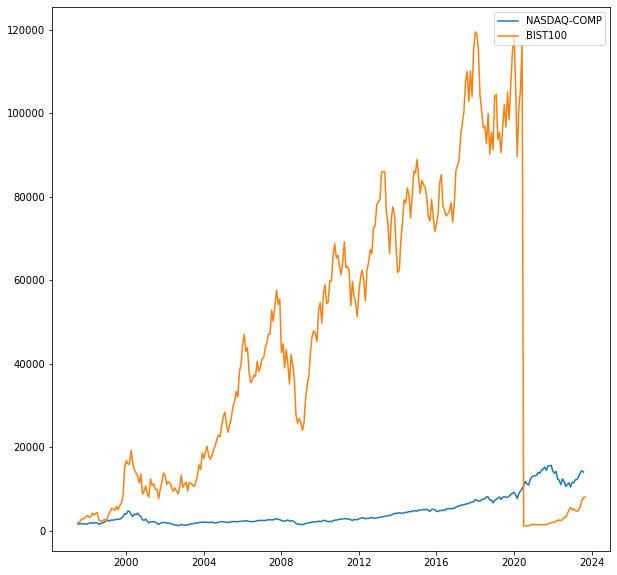

In [27]:
plt.figure(figsize = (10, 10))
plt.plot(nasdaq_series["Close"], label = "NASDAQ-COMP")
plt.plot(bist100_series["Close"], label = "BIST100")
plt.legend(loc = "upper right")


An infamous stock market crash happened in Turkey around 2019-2020, which can be seen obviously in the graph above. The obvious rising trend in BIST100 series above is most likely due the signicant devaluation in Turkish currency, against US dollars. Furthermore, there probably is a seasonal pattern and various periodic influences in BIST100 data, which can be explored further in another notebook.

# Plotting ACF and PACF of series

C:\Users\kagan\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 720x720 with 0 Axes>

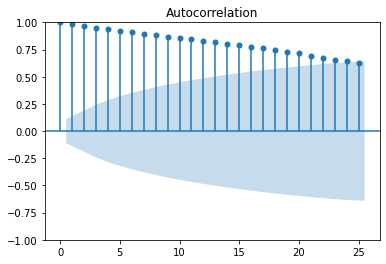

<Figure size 720x720 with 0 Axes>

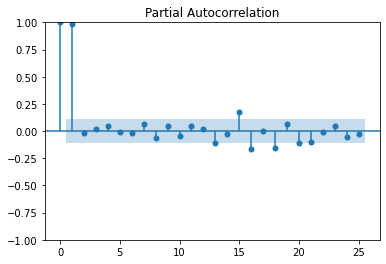

In [28]:
# ACF and PACF of NASDAQ-COMP
plt.figure(figsize=(10, 10))
_ = plot_acf(nasdaq_series["Close"])
plt.figure(figsize=(10, 10))
_ = plot_pacf(nasdaq_series["Close"])


C:\Users\kagan\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 720x720 with 0 Axes>

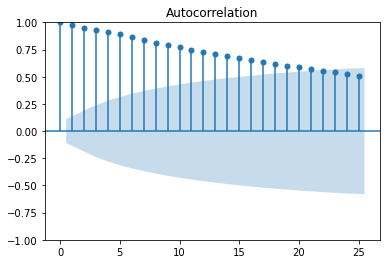

<Figure size 720x720 with 0 Axes>

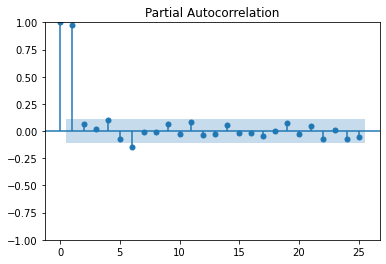

In [29]:
# ACF and PACF of BIST100
plt.figure(figsize=(10, 10))
_ = plot_acf(bist100_series["Close"])
plt.figure(figsize=(10, 10))
_ = plot_pacf(bist100_series["Close"])


Apparently, both series are non-stationary at level. First differences will be taken to see whether the series becomes stationary.

C:\Users\kagan\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 720x720 with 0 Axes>

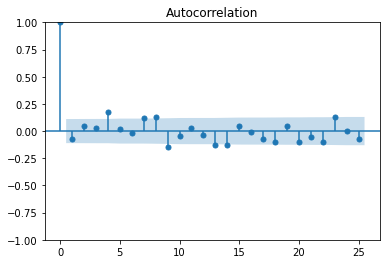

<Figure size 720x720 with 0 Axes>

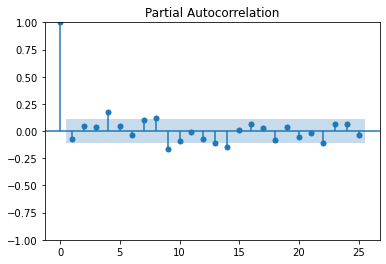

In [30]:
# ACF and PACF of NASDAQ-COMP, first difference
plt.figure(figsize=(10, 10))
_ = plot_acf(nasdaq_series["Close"].diff().dropna())
plt.figure(figsize=(10, 10))
_ = plot_pacf(nasdaq_series["Close"].diff().dropna())


C:\Users\kagan\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 720x720 with 0 Axes>

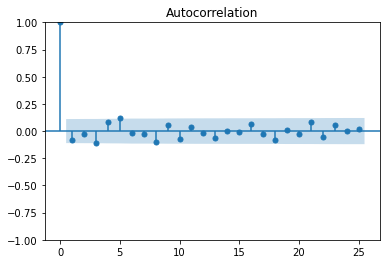

<Figure size 720x720 with 0 Axes>

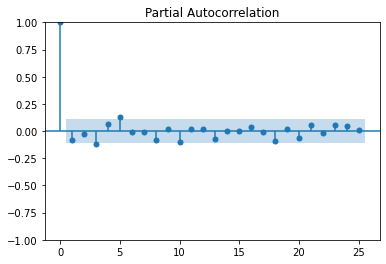

In [31]:
# ACF and PACF of BIST100, first difference
plt.figure(figsize=(10, 10))
_ = plot_acf(bist100_series["Close"].diff().dropna())
plt.figure(figsize=(10, 10))
_ = plot_pacf(bist100_series["Close"].diff().dropna())


Good news, everyone! Both series are apparently stationary at first difference, which one of the requirements of cointegration, in case we want to analyse cointegration. The series are shown below to check whether any anomalies are present in the differenced series.

In [32]:
nasdaq_series["Close"].diff().dropna()

Date
1997-08-01 00:00:00-04:00     -6.490112
1997-09-01 00:00:00-04:00     98.369995
1997-10-01 00:00:00-04:00    -92.079956
1997-11-01 00:00:00-05:00      6.940063
1997-12-01 00:00:00-05:00    -30.200073
                                ...    
2023-04-01 00:00:00-04:00      4.669922
2023-05-01 00:00:00-04:00    708.709961
2023-06-01 00:00:00-04:00    852.629883
2023-07-01 00:00:00-04:00    558.099609
2023-08-01 00:00:00-04:00   -311.049805
Name: Close, Length: 313, dtype: float64

In [33]:
bist100_series["Close"].diff().dropna()

Date
1997-08-01 00:00:00+03:00      27.000000
1997-09-01 00:00:00+03:00     613.000000
1997-10-01 00:00:00+03:00     253.000000
1997-11-01 00:00:00+02:00      33.000000
1997-12-01 00:00:00+02:00     572.000000
                                ...     
2023-05-01 00:00:00+03:00     269.000000
2023-06-01 00:00:00+03:00     872.200195
2023-07-01 00:00:00+03:00    1457.899902
2023-08-01 00:00:00+03:00     700.899902
2023-09-01 00:00:00+03:00     138.220215
Name: Close, Length: 314, dtype: float64

## Plotting first difference of these series

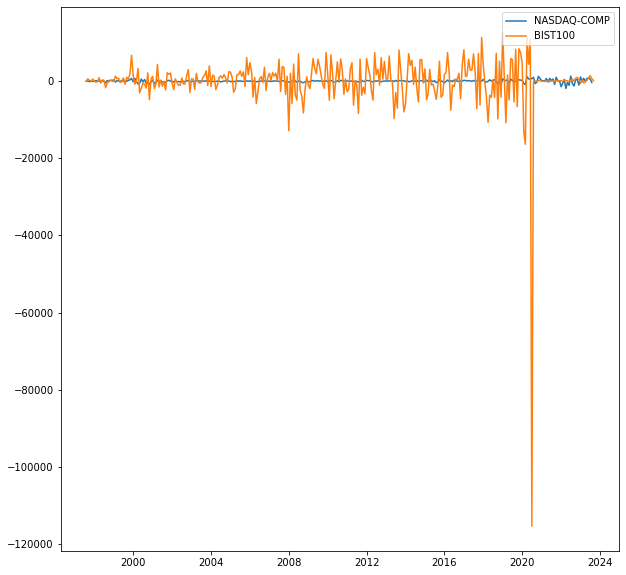

In [34]:
plt.figure(figsize = (10, 10))
plt.plot(nasdaq_series["Close"].diff().dropna(), label = "NASDAQ-COMP")
plt.plot(bist100_series["Close"].diff().dropna(), label = "BIST100")
plt.legend(loc = "upper right")


BIST100 indices dominate the plot because Turkish currency TRY is significantly undervalued compared to USD, and BIST100 data is represented in terms of TRY in Yahoo Finance.

# Granger Causality Analysis
Simply put, Granger causality tests regresses one time series Y over itself (autoregression), then performs the series itself and another time series X on Y, together. If the second regression with other time series is more statistically significant, X is said to Granger-cause Y. 

As US and Turkey are not in the same time zone, the index datetime series will be set to index numbers.

In [35]:
test_dataframe_level = pd.concat([bist100_series["Close"].reset_index(), nasdaq_series["Close"].reset_index()], 
                           axis = 1, 
                           names = ["BIST100", "NASDAQ-COMP"]).dropna(axis = 0)
test_dataframe_differenced = pd.concat([bist100_series["Close"].diff().dropna().reset_index(), nasdaq_series["Close"].diff().dropna().reset_index()], 
                           axis = 1, 
                           names = ["BIST100", "NASDAQ-COMP"]).dropna(axis = 0) # second column is considered the cause series

In [36]:
test_dataframe_differenced.columns = ["Date 1", "BIST100", "Date 2", "NASDAQ-COMP"]
test_dataframe_differenced = test_dataframe_differenced[["BIST100", "NASDAQ-COMP"]]

In [37]:
causality_test_results = grangercausalitytests(test_dataframe_differenced, maxlag = 20)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3623  , p=0.2440  , df_denom=309, df_num=1
ssr based chi2 test:   chi2=1.3755  , p=0.2409  , df=1
likelihood ratio test: chi2=1.3725  , p=0.2414  , df=1
parameter F test:         F=1.3623  , p=0.2440  , df_denom=309, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2563  , p=0.1065  , df_denom=306, df_num=2
ssr based chi2 test:   chi2=4.5863  , p=0.1009  , df=2
likelihood ratio test: chi2=4.5528  , p=0.1027  , df=2
parameter F test:         F=2.2563  , p=0.1065  , df_denom=306, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.9522  , p=0.0006  , df_denom=303, df_num=3
ssr based chi2 test:   chi2=18.2693 , p=0.0004  , df=3
likelihood ratio test: chi2=17.7512 , p=0.0005  , df=3
parameter F test:         F=5.9522  , p=0.0006  , df_denom=303, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.6517  , p=0.0012  

# Conclusion
As can be seen, up to 20 lags from 3rd lag, (differenced) NASDAQ-COMP can be said to influence (differenced) BIST100. This means that an event that happens in NASDAQ-COMP stock market is expected to influence BIST100. That is, future values of BIST100 follow NASDAQ-COMP, albeit with a certain lag. The statistical implication is that future values of BIST100 index can be forecasted through models on NASDAQ-COMP. 